In [1]:
!pip install stable-baselines3 gym-anytrading gym

In [2]:
# openAI gym - for environments
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

# Stable baselines - for RL implementation
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Dataset

In [3]:
df = pd.read_csv('1hour.csv')
column_names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time']
df.columns = column_names
pd.to_datetime(1502942400.0, unit='s')
pd.to_datetime(df['Open time'], unit='s')
df['Open time'] = pd.to_datetime(df['Open time'], unit='s')
df['Close time'] = pd.to_datetime(df['Close time'], unit='ms')

,Open,High,Low,Close,Volume,Close time
Open time,,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13529.01,443.356199,2018-01-01 00:59:59.999
2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,383.697006,2018-01-01 01:59:59.999
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572,2018-01-01 02:59:59.999
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030,2018-01-01 03:59:59.999
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329,2018-01-01 04:59:59.999
...,...,...,...,...,...,...
2022-01-31 19:00:00,38468.29,38744.00,38383.91,38415.79,1944.849570,2022-01-31 19:59:59.999
2022-01-31 20:00:00,38415.79,38563.37,38236.69,38450.62,1639.696270,2022-01-31 20:59:59.999
2022-01-31 21:00:00,38450.62,38531.53,38335.00,38410.09,923.752380,2022-01-31 21:59:59.999


In [ ]:
start_date = pd.to_datetime('2018-01-01 00:00:00')
end_date = pd.to_datetime('2022-01-31 23:00:00')
main = df.loc[(df["Open time"] >= start_date) & (df["Open time"] <= end_date)].copy(deep=True)
main.set_index('Open time', inplace=True)

main

In [5]:
del main['Close time']
main

,Open,High,Low,Close,Volume
Open time,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13529.01,443.356199
2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,383.697006
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329
...,...,...,...,...,...
2022-01-31 19:00:00,38468.29,38744.00,38383.91,38415.79,1944.849570
2022-01-31 20:00:00,38415.79,38563.37,38236.69,38450.62,1639.696270
2022-01-31 21:00:00,38450.62,38531.53,38335.00,38410.09,923.752380


In [6]:
main.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

# Adding custom indicators

In [7]:
!pip install finta

In [9]:
from gym_anytrading.envs import StocksEnv
from finta import TA

Bollinger Bands

In [12]:
df_bbands = TA.BBANDS(main, 14)
df_bbands.fillna(0, inplace=True)
df_bbands.head()

,BB_UPPER,BB_MIDDLE,BB_LOWER
Open time,,,
2018-01-01 00:00:00,0.0,0.0,0.0
2018-01-01 01:00:00,0.0,0.0,0.0
2018-01-01 02:00:00,0.0,0.0,0.0
2018-01-01 03:00:00,0.0,0.0,0.0
2018-01-01 04:00:00,0.0,0.0,0.0


Relative Strength Index (RSI), Volume Weighted Average Price (VWAP), Simple Moving Average (SMA), and On-Balance Volume (OBV) Indicators

In [13]:
main['RSI'] = TA.RSI(main, 16)
main['VWAP'] = TA.VWAP(main)
main.fillna(0, inplace=True)

In [34]:
main['SMA'] = TA.SMA(main, 16)
main['OBV'] = TA.OBV(main)
main.fillna(0, inplace=True)

In [35]:
main

,Open,High,Low,Close,Volume,RSI,VWAP,SMA,OBV
Open time,,,,,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13400.01,13529.01,443.356199,0.000000,13548.223333,0.000000,0.000000
2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,383.697006,0.000000,13441.466239,0.000000,-383.697006
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572,29.378449,13398.678949,0.000000,45.367566
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030,40.993442,13408.307955,0.000000,465.454596
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329,58.434034,13426.416995,0.000000,806.261925
...,...,...,...,...,...,...,...,...,...
2022-01-31 19:00:00,38468.29,38744.00,38383.91,38415.79,1944.849570,65.670279,21057.282391,37508.863125,371238.087846
2022-01-31 20:00:00,38415.79,38563.37,38236.69,38450.62,1639.696270,66.155771,21057.633071,37604.974375,372877.784116
2022-01-31 21:00:00,38450.62,38531.53,38335.00,38410.09,923.752380,65.014538,21057.830725,37693.001875,371954.031736


In [36]:
data = main.merge(df_bbands, on=['Open time'], how='inner')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35687 entries, 2018-01-01 00:00:00 to 2022-01-31 23:00:00
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       35687 non-null  float64
 1   High       35687 non-null  float64
 2   Low        35687 non-null  float64
 3   Close      35687 non-null  float64
 4   Volume     35687 non-null  float64
 5   RSI        35687 non-null  float64
 6   VWAP       35687 non-null  float64
 7   SMA        35687 non-null  float64
 8   OBV        35687 non-null  float64
 9   BB_UPPER   35687 non-null  float64
 10  BB_MIDDLE  35687 non-null  float64
 11  BB_LOWER   35687 non-null  float64
dtypes: float64(12)
memory usage: 3.5 MB


### Creating Custom Environments

In [38]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV', 'BB_UPPER','BB_LOWER']].to_numpy()[start:end]
    return prices, signal_features

In [39]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=data, window_size=16, frame_bound=(16,28550))

In [40]:
env2.signal_features

array([[ 1.34000100e+04,  4.43356199e+02,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.31553800e+04,  3.83697006e+02,  0.00000000e+00, ...,
        -3.83697006e+02,  0.00000000e+00,  0.00000000e+00],
       [ 1.32000000e+04,  4.29064572e+02,  0.00000000e+00, ...,
         4.53675660e+01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.79335600e+04,  1.32651215e+03,  5.76406250e+04, ...,
         6.92654421e+05,  5.82499381e+04,  5.73344519e+04],
       [ 5.78500000e+04,  1.27511486e+03,  5.77134538e+04, ...,
         6.91379306e+05,  5.82445612e+04,  5.74014374e+04],
       [ 5.78060300e+04,  9.79303042e+02,  5.78112369e+04, ...,
         6.92358609e+05,  5.82276939e+04,  5.74965604e+04]])

In [41]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [43]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 1773     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | -0.0315  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 4.63     |
|    value_loss         | 67.6     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1809     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -0.0358  |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 122      |
|    value_loss      

------------------------------------
| time/                 |          |
|    fps                | 1781     |
|    iterations         | 1700     |
|    time_elapsed       | 4        |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.654   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 38.2     |
|    value_loss         | 7.03e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1782     |
|    iterations         | 1800     |
|    time_elapsed       | 5        |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | 28       |
|    value_loss         | 1.42e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1774     |
|    iterations         | 3300     |
|    time_elapsed       | 9        |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | -0.0906  |
|    value_loss         | 0.0251   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1769      |
|    iterations         | 3400      |
|    time_elapsed       | 9         |
|    total_timesteps    | 17000     |
| train/                |           |
|    entropy_loss       | -0.684    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3399      |
|    policy_loss        | -18.6     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1746     |
|    iterations         | 4900     |
|    time_elapsed       | 14       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.664   |
|    explained_variance | -0.00403 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | -56.2    |
|    value_loss         | 1.05e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1748     |
|    iterations         | 5000     |
|    time_elapsed       | 14       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | -0.00487 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 45.8     |
|    value_loss         | 7.54e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1746     |
|    iterations         | 6500     |
|    time_elapsed       | 18       |
|    total_timesteps    | 32500    |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6499     |
|    policy_loss        | -0.126   |
|    value_loss         | 188      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1748     |
|    iterations         | 6600     |
|    time_elapsed       | 18       |
|    total_timesteps    | 33000    |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6599     |
|    policy_loss        | 3.29     |
|    value_loss         | 47.6     |
-

------------------------------------
| time/                 |          |
|    fps                | 1745     |
|    iterations         | 8100     |
|    time_elapsed       | 23       |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | -8.52    |
|    value_loss         | 1.22e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1744     |
|    iterations         | 8200     |
|    time_elapsed       | 23       |
|    total_timesteps    | 41000    |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | -0.00788 |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | -20.2    |
|    value_loss         | 1.32e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1730     |
|    iterations         | 9700     |
|    time_elapsed       | 28       |
|    total_timesteps    | 48500    |
| train/                |          |
|    entropy_loss       | -0.682   |
|    explained_variance | -6.2e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9699     |
|    policy_loss        | -45.6    |
|    value_loss         | 4.81e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1730     |
|    iterations         | 9800     |
|    time_elapsed       | 28       |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | 16.9     |
|    value_loss         | 739      |
-

------------------------------------
| time/                 |          |
|    fps                | 1734     |
|    iterations         | 11300    |
|    time_elapsed       | 32       |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | 46.5     |
|    value_loss         | 2.3e+04  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1734      |
|    iterations         | 11400     |
|    time_elapsed       | 32        |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | 64.1      |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1744      |
|    iterations         | 12900     |
|    time_elapsed       | 36        |
|    total_timesteps    | 64500     |
| train/                |           |
|    entropy_loss       | -0.686    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12899     |
|    policy_loss        | -17.4     |
|    value_loss         | 1.9e+03   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1745     |
|    iterations         | 13000    |
|    time_elapsed       | 37       |
|    total_timesteps    | 65000    |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | -10.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 12999    |
|    policy_loss        | -0.0248  |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1753     |
|    iterations         | 14500    |
|    time_elapsed       | 41       |
|    total_timesteps    | 72500    |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0.00536  |
|    learning_rate      | 0.0007   |
|    n_updates          | 14499    |
|    policy_loss        | -30.7    |
|    value_loss         | 2.36e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1753     |
|    iterations         | 14600    |
|    time_elapsed       | 41       |
|    total_timesteps    | 73000    |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 14599    |
|    policy_loss        | 3.75     |
|    value_loss         | 36.6     |
-

-------------------------------------
| time/                 |           |
|    fps                | 1760      |
|    iterations         | 16100     |
|    time_elapsed       | 45        |
|    total_timesteps    | 80500     |
| train/                |           |
|    entropy_loss       | -0.682    |
|    explained_variance | -0.000209 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16099     |
|    policy_loss        | 59        |
|    value_loss         | 1.33e+04  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 16200    |
|    time_elapsed       | 46       |
|    total_timesteps    | 81000    |
| train/                |          |
|    entropy_loss       | -0.673   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16199    |
|    policy_loss        | -3.76    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1767     |
|    iterations         | 17700    |
|    time_elapsed       | 50       |
|    total_timesteps    | 88500    |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17699    |
|    policy_loss        | 65.5     |
|    value_loss         | 1.12e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1767     |
|    iterations         | 17800    |
|    time_elapsed       | 50       |
|    total_timesteps    | 89000    |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17799    |
|    policy_loss        | 113      |
|    value_loss         | 2.82e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 1773     |
|    iterations         | 19300    |
|    time_elapsed       | 54       |
|    total_timesteps    | 96500    |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0.363    |
|    learning_rate      | 0.0007   |
|    n_updates          | 19299    |
|    policy_loss        | -0.0275  |
|    value_loss         | 0.00197  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1773     |
|    iterations         | 19400    |
|    time_elapsed       | 54       |
|    total_timesteps    | 97000    |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 19399    |
|    policy_loss        | 17.9     |
|    value_loss         | 731      |
-

------------------------------------
| time/                 |          |
|    fps                | 1779     |
|    iterations         | 20900    |
|    time_elapsed       | 58       |
|    total_timesteps    | 104500   |
| train/                |          |
|    entropy_loss       | -0.517   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 20899    |
|    policy_loss        | -30.6    |
|    value_loss         | 3.56e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1779     |
|    iterations         | 21000    |
|    time_elapsed       | 59       |
|    total_timesteps    | 105000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 20999    |
|    policy_loss        | 2.39     |
|    value_loss         | 19.8     |
-

------------------------------------
| time/                 |          |
|    fps                | 1777     |
|    iterations         | 22500    |
|    time_elapsed       | 63       |
|    total_timesteps    | 112500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 22499    |
|    policy_loss        | -29.5    |
|    value_loss         | 4.56e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1777     |
|    iterations         | 22600    |
|    time_elapsed       | 63       |
|    total_timesteps    | 113000   |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 22599    |
|    policy_loss        | -240     |
|    value_loss         | 2.82e+05 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1781      |
|    iterations         | 24100     |
|    time_elapsed       | 67        |
|    total_timesteps    | 120500    |
| train/                |           |
|    entropy_loss       | -0.686    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 24099     |
|    policy_loss        | 10.3      |
|    value_loss         | 537       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1781     |
|    iterations         | 24200    |
|    time_elapsed       | 67       |
|    total_timesteps    | 121000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 24199    |
|    policy_loss        | -2.19    |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 1784      |
|    iterations         | 25700     |
|    time_elapsed       | 72        |
|    total_timesteps    | 128500    |
| train/                |           |
|    entropy_loss       | -0.689    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 25699     |
|    policy_loss        | -13.8     |
|    value_loss         | 709       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1784     |
|    iterations         | 25800    |
|    time_elapsed       | 72       |
|    total_timesteps    | 129000   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 25799    |
|    policy_loss        | 2.51     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1787     |
|    iterations         | 27300    |
|    time_elapsed       | 76       |
|    total_timesteps    | 136500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 27299    |
|    policy_loss        | -1.77    |
|    value_loss         | 31.7     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1787     |
|    iterations         | 27400    |
|    time_elapsed       | 76       |
|    total_timesteps    | 137000   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | -2.36    |
|    learning_rate      | 0.0007   |
|    n_updates          | 27399    |
|    policy_loss        | -0.00888 |
|    value_loss         | 0.0021   |
-

------------------------------------
| time/                 |          |
|    fps                | 1790     |
|    iterations         | 28900    |
|    time_elapsed       | 80       |
|    total_timesteps    | 144500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 28899    |
|    policy_loss        | -44.4    |
|    value_loss         | 6.01e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1790     |
|    iterations         | 29000    |
|    time_elapsed       | 80       |
|    total_timesteps    | 145000   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 28999    |
|    policy_loss        | 21.5     |
|    value_loss         | 1.18e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1792     |
|    iterations         | 30500    |
|    time_elapsed       | 85       |
|    total_timesteps    | 152500   |
| train/                |          |
|    entropy_loss       | -0.677   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 30499    |
|    policy_loss        | -4.27    |
|    value_loss         | 39.3     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1792     |
|    iterations         | 30600    |
|    time_elapsed       | 85       |
|    total_timesteps    | 153000   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 30599    |
|    policy_loss        | -0.0387  |
|    value_loss         | 0.00575  |
-

------------------------------------
| time/                 |          |
|    fps                | 1790     |
|    iterations         | 32100    |
|    time_elapsed       | 89       |
|    total_timesteps    | 160500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 32099    |
|    policy_loss        | -0.0364  |
|    value_loss         | 0.00323  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1790     |
|    iterations         | 32200    |
|    time_elapsed       | 89       |
|    total_timesteps    | 161000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 32199    |
|    policy_loss        | -13.7    |
|    value_loss         | 653      |
-

-------------------------------------
| time/                 |           |
|    fps                | 1789      |
|    iterations         | 33700     |
|    time_elapsed       | 94        |
|    total_timesteps    | 168500    |
| train/                |           |
|    entropy_loss       | -0.688    |
|    explained_variance | -1.54e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 33699     |
|    policy_loss        | 70        |
|    value_loss         | 2.53e+04  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1789     |
|    iterations         | 33800    |
|    time_elapsed       | 94       |
|    total_timesteps    | 169000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 33799    |
|    policy_loss        | 4.08     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1788     |
|    iterations         | 35300    |
|    time_elapsed       | 98       |
|    total_timesteps    | 176500   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 35299    |
|    policy_loss        | 2.82     |
|    value_loss         | 103      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1788     |
|    iterations         | 35400    |
|    time_elapsed       | 98       |
|    total_timesteps    | 177000   |
| train/                |          |
|    entropy_loss       | -0.651   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 35399    |
|    policy_loss        | -0.0235  |
|    value_loss         | 0.0035   |
-

------------------------------------
| time/                 |          |
|    fps                | 1786     |
|    iterations         | 36900    |
|    time_elapsed       | 103      |
|    total_timesteps    | 184500   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 36899    |
|    policy_loss        | 96.7     |
|    value_loss         | 2.8e+04  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1785     |
|    iterations         | 37000    |
|    time_elapsed       | 103      |
|    total_timesteps    | 185000   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | -0.00293 |
|    learning_rate      | 0.0007   |
|    n_updates          | 36999    |
|    policy_loss        | 16.1     |
|    value_loss         | 1.03e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1778     |
|    iterations         | 38500    |
|    time_elapsed       | 108      |
|    total_timesteps    | 192500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 38499    |
|    policy_loss        | -7.69    |
|    value_loss         | 122      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1778     |
|    iterations         | 38600    |
|    time_elapsed       | 108      |
|    total_timesteps    | 193000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 38599    |
|    policy_loss        | -1.93    |
|    value_loss         | 12.4     |
-

------------------------------------
| time/                 |          |
|    fps                | 1774     |
|    iterations         | 40100    |
|    time_elapsed       | 113      |
|    total_timesteps    | 200500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 40099    |
|    policy_loss        | -177     |
|    value_loss         | 8.14e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1774     |
|    iterations         | 40200    |
|    time_elapsed       | 113      |
|    total_timesteps    | 201000   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 1.11e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 40199    |
|    policy_loss        | 1.58     |
|    value_loss         | 40.8     |
-

------------------------------------
| time/                 |          |
|    fps                | 1771     |
|    iterations         | 41700    |
|    time_elapsed       | 117      |
|    total_timesteps    | 208500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 41699    |
|    policy_loss        | 4.14     |
|    value_loss         | 89.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1770     |
|    iterations         | 41800    |
|    time_elapsed       | 118      |
|    total_timesteps    | 209000   |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 41799    |
|    policy_loss        | -7.88    |
|    value_loss         | 208      |
-

------------------------------------
| time/                 |          |
|    fps                | 1765     |
|    iterations         | 43300    |
|    time_elapsed       | 122      |
|    total_timesteps    | 216500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 43299    |
|    policy_loss        | -0.0458  |
|    value_loss         | 0.00513  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1764      |
|    iterations         | 43400     |
|    time_elapsed       | 122       |
|    total_timesteps    | 217000    |
| train/                |           |
|    entropy_loss       | -0.687    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 43399     |
|    policy_loss        | -26.4     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 44900    |
|    time_elapsed       | 127      |
|    total_timesteps    | 224500   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | -0.00101 |
|    learning_rate      | 0.0007   |
|    n_updates          | 44899    |
|    policy_loss        | 17.1     |
|    value_loss         | 862      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 45000    |
|    time_elapsed       | 127      |
|    total_timesteps    | 225000   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 44999    |
|    policy_loss        | -19.6    |
|    value_loss         | 2.65e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 46500    |
|    time_elapsed       | 132      |
|    total_timesteps    | 232500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 46499    |
|    policy_loss        | -28.4    |
|    value_loss         | 1.57e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 46600    |
|    time_elapsed       | 132      |
|    total_timesteps    | 233000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 46599    |
|    policy_loss        | -0.0299  |
|    value_loss         | 0.00285  |
-

------------------------------------
| time/                 |          |
|    fps                | 1762     |
|    iterations         | 48100    |
|    time_elapsed       | 136      |
|    total_timesteps    | 240500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 48099    |
|    policy_loss        | 8.92     |
|    value_loss         | 152      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1762     |
|    iterations         | 48200    |
|    time_elapsed       | 136      |
|    total_timesteps    | 241000   |
| train/                |          |
|    entropy_loss       | -0.67    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 48199    |
|    policy_loss        | -32.5    |
|    value_loss         | 3.08e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1763     |
|    iterations         | 49700    |
|    time_elapsed       | 140      |
|    total_timesteps    | 248500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 49699    |
|    policy_loss        | 12.1     |
|    value_loss         | 526      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1762      |
|    iterations         | 49800     |
|    time_elapsed       | 141       |
|    total_timesteps    | 249000    |
| train/                |           |
|    entropy_loss       | -0.676    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 49799     |
|    policy_loss        | -0.0439   |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 51300    |
|    time_elapsed       | 145      |
|    total_timesteps    | 256500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 51299    |
|    policy_loss        | -195     |
|    value_loss         | 8.3e+04  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 51400    |
|    time_elapsed       | 145      |
|    total_timesteps    | 257000   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0.000989 |
|    learning_rate      | 0.0007   |
|    n_updates          | 51399    |
|    policy_loss        | -28.3    |
|    value_loss         | 2.62e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1754     |
|    iterations         | 52900    |
|    time_elapsed       | 150      |
|    total_timesteps    | 264500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -1.32    |
|    learning_rate      | 0.0007   |
|    n_updates          | 52899    |
|    policy_loss        | -0.0267  |
|    value_loss         | 0.00199  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1754      |
|    iterations         | 53000     |
|    time_elapsed       | 151       |
|    total_timesteps    | 265000    |
| train/                |           |
|    entropy_loss       | -0.487    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 52999     |
|    policy_loss        | 4.4       |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 54500    |
|    time_elapsed       | 155      |
|    total_timesteps    | 272500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 54499    |
|    policy_loss        | -10.1    |
|    value_loss         | 284      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 54600    |
|    time_elapsed       | 155      |
|    total_timesteps    | 273000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 54599    |
|    policy_loss        | -49.9    |
|    value_loss         | 5.26e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1750     |
|    iterations         | 56100    |
|    time_elapsed       | 160      |
|    total_timesteps    | 280500   |
| train/                |          |
|    entropy_loss       | -0.592   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 56099    |
|    policy_loss        | -0.0114  |
|    value_loss         | 0.00147  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1750     |
|    iterations         | 56200    |
|    time_elapsed       | 160      |
|    total_timesteps    | 281000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 56199    |
|    policy_loss        | 169      |
|    value_loss         | 7.35e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 57700    |
|    time_elapsed       | 164      |
|    total_timesteps    | 288500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 57699    |
|    policy_loss        | -64.3    |
|    value_loss         | 1.09e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 57800    |
|    time_elapsed       | 165      |
|    total_timesteps    | 289000   |
| train/                |          |
|    entropy_loss       | -0.68    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 57799    |
|    policy_loss        | 15.4     |
|    value_loss         | 433      |
-

------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 59300    |
|    time_elapsed       | 169      |
|    total_timesteps    | 296500   |
| train/                |          |
|    entropy_loss       | -0.649   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 59299    |
|    policy_loss        | 0.933    |
|    value_loss         | 24.1     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1751      |
|    iterations         | 59400     |
|    time_elapsed       | 169       |
|    total_timesteps    | 297000    |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 59399     |
|    policy_loss        | 14.5      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 60900    |
|    time_elapsed       | 173      |
|    total_timesteps    | 304500   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 3.4e-05  |
|    learning_rate      | 0.0007   |
|    n_updates          | 60899    |
|    policy_loss        | 33.7     |
|    value_loss         | 5.77e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 61000    |
|    time_elapsed       | 174      |
|    total_timesteps    | 305000   |
| train/                |          |
|    entropy_loss       | -0.682   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 60999    |
|    policy_loss        | -0.0144  |
|    value_loss         | 0.000791 |
-

------------------------------------
| time/                 |          |
|    fps                | 1752     |
|    iterations         | 62500    |
|    time_elapsed       | 178      |
|    total_timesteps    | 312500   |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 62499    |
|    policy_loss        | -4.79    |
|    value_loss         | 409      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1752     |
|    iterations         | 62600    |
|    time_elapsed       | 178      |
|    total_timesteps    | 313000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 62599    |
|    policy_loss        | -281     |
|    value_loss         | 2.63e+05 |
-

------------------------------------
| time/                 |          |
|    fps                | 1752     |
|    iterations         | 64100    |
|    time_elapsed       | 182      |
|    total_timesteps    | 320500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 64099    |
|    policy_loss        | -2.38    |
|    value_loss         | 32       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1752     |
|    iterations         | 64200    |
|    time_elapsed       | 183      |
|    total_timesteps    | 321000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 64199    |
|    policy_loss        | -0.744   |
|    value_loss         | 1.15     |
-

------------------------------------
| time/                 |          |
|    fps                | 1753     |
|    iterations         | 65700    |
|    time_elapsed       | 187      |
|    total_timesteps    | 328500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 65699    |
|    policy_loss        | -0.039   |
|    value_loss         | 0.00372  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1753     |
|    iterations         | 65800    |
|    time_elapsed       | 187      |
|    total_timesteps    | 329000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 65799    |
|    policy_loss        | -1.44    |
|    value_loss         | 1.82e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1753     |
|    iterations         | 67300    |
|    time_elapsed       | 191      |
|    total_timesteps    | 336500   |
| train/                |          |
|    entropy_loss       | -0.647   |
|    explained_variance | 0.00739  |
|    learning_rate      | 0.0007   |
|    n_updates          | 67299    |
|    policy_loss        | 28.7     |
|    value_loss         | 2.04e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1753     |
|    iterations         | 67400    |
|    time_elapsed       | 192      |
|    total_timesteps    | 337000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 67399    |
|    policy_loss        | -0.0366  |
|    value_loss         | 0.00289  |
-

------------------------------------
| time/                 |          |
|    fps                | 1754     |
|    iterations         | 68900    |
|    time_elapsed       | 196      |
|    total_timesteps    | 344500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 68899    |
|    policy_loss        | 24.8     |
|    value_loss         | 3.2e+03  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1754     |
|    iterations         | 69000    |
|    time_elapsed       | 196      |
|    total_timesteps    | 345000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 68999    |
|    policy_loss        | -76.5    |
|    value_loss         | 1.64e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 1754     |
|    iterations         | 70500    |
|    time_elapsed       | 200      |
|    total_timesteps    | 352500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 70499    |
|    policy_loss        | -0.0511  |
|    value_loss         | 0.00696  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1754      |
|    iterations         | 70600     |
|    time_elapsed       | 201       |
|    total_timesteps    | 353000    |
| train/                |           |
|    entropy_loss       | -0.689    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 70599     |
|    policy_loss        | 2.56      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 72100    |
|    time_elapsed       | 205      |
|    total_timesteps    | 360500   |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 72099    |
|    policy_loss        | 15.4     |
|    value_loss         | 1.47e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 72200    |
|    time_elapsed       | 205      |
|    total_timesteps    | 361000   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 72199    |
|    policy_loss        | -22.2    |
|    value_loss         | 968      |
-

------------------------------------
| time/                 |          |
|    fps                | 1754     |
|    iterations         | 73700    |
|    time_elapsed       | 210      |
|    total_timesteps    | 368500   |
| train/                |          |
|    entropy_loss       | -0.636   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 73699    |
|    policy_loss        | 95.6     |
|    value_loss         | 1.35e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1754     |
|    iterations         | 73800    |
|    time_elapsed       | 210      |
|    total_timesteps    | 369000   |
| train/                |          |
|    entropy_loss       | -0.622   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 73799    |
|    policy_loss        | -182     |
|    value_loss         | 7.02e+04 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1752      |
|    iterations         | 75300     |
|    time_elapsed       | 214       |
|    total_timesteps    | 376500    |
| train/                |           |
|    entropy_loss       | -0.688    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 75299     |
|    policy_loss        | 0.939     |
|    value_loss         | 7.17      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1752      |
|    iterations         | 75400     |
|    time_elapsed       | 215       |
|    total_timesteps    | 377000    |
| train/                |           |
|    entropy_loss       | -0.683    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 75399     |
|    policy_loss        | 3.1       |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 1750      |
|    iterations         | 76900     |
|    time_elapsed       | 219       |
|    total_timesteps    | 384500    |
| train/                |           |
|    entropy_loss       | -0.598    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 76899     |
|    policy_loss        | 5.33      |
|    value_loss         | 111       |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1750      |
|    iterations         | 77000     |
|    time_elapsed       | 219       |
|    total_timesteps    | 385000    |
| train/                |           |
|    entropy_loss       | -0.682    |
|    explained_variance | -0.000251 |
|    learning_rate      | 0.0007    |
|    n_updates          | 76999     |
|    policy_loss        | 15.7      |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 1748     |
|    iterations         | 78500    |
|    time_elapsed       | 224      |
|    total_timesteps    | 392500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 78499    |
|    policy_loss        | 1.9      |
|    value_loss         | 12.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1748     |
|    iterations         | 78600    |
|    time_elapsed       | 224      |
|    total_timesteps    | 393000   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 78599    |
|    policy_loss        | -2.09    |
|    value_loss         | 22.2     |
-

------------------------------------
| time/                 |          |
|    fps                | 1747     |
|    iterations         | 80100    |
|    time_elapsed       | 229      |
|    total_timesteps    | 400500   |
| train/                |          |
|    entropy_loss       | -0.666   |
|    explained_variance | 0.0428   |
|    learning_rate      | 0.0007   |
|    n_updates          | 80099    |
|    policy_loss        | -0.0179  |
|    value_loss         | 0.00166  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1747     |
|    iterations         | 80200    |
|    time_elapsed       | 229      |
|    total_timesteps    | 401000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 80199    |
|    policy_loss        | 0.366    |
|    value_loss         | 1.43     |
-

------------------------------------
| time/                 |          |
|    fps                | 1747     |
|    iterations         | 81700    |
|    time_elapsed       | 233      |
|    total_timesteps    | 408500   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 81699    |
|    policy_loss        | 3.5      |
|    value_loss         | 47.1     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1747      |
|    iterations         | 81800     |
|    time_elapsed       | 234       |
|    total_timesteps    | 409000    |
| train/                |           |
|    entropy_loss       | -0.689    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 81799     |
|    policy_loss        | 1.71      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1745     |
|    iterations         | 83300    |
|    time_elapsed       | 238      |
|    total_timesteps    | 416500   |
| train/                |          |
|    entropy_loss       | -0.604   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 83299    |
|    policy_loss        | -0.0183  |
|    value_loss         | 0.00344  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1745     |
|    iterations         | 83400    |
|    time_elapsed       | 238      |
|    total_timesteps    | 417000   |
| train/                |          |
|    entropy_loss       | -0.627   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 83399    |
|    policy_loss        | -64.9    |
|    value_loss         | 9.06e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1747     |
|    iterations         | 84900    |
|    time_elapsed       | 242      |
|    total_timesteps    | 424500   |
| train/                |          |
|    entropy_loss       | -0.646   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 84899    |
|    policy_loss        | 1.43     |
|    value_loss         | 59.1     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1747     |
|    iterations         | 85000    |
|    time_elapsed       | 243      |
|    total_timesteps    | 425000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 84999    |
|    policy_loss        | -0.0574  |
|    value_loss         | 0.011    |
-

------------------------------------
| time/                 |          |
|    fps                | 1748     |
|    iterations         | 86500    |
|    time_elapsed       | 247      |
|    total_timesteps    | 432500   |
| train/                |          |
|    entropy_loss       | -0.656   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 86499    |
|    policy_loss        | -28.2    |
|    value_loss         | 3.03e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1748     |
|    iterations         | 86600    |
|    time_elapsed       | 247      |
|    total_timesteps    | 433000   |
| train/                |          |
|    entropy_loss       | -0.585   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 86599    |
|    policy_loss        | -0.0174  |
|    value_loss         | 0.00252  |
-

-------------------------------------
| time/                 |           |
|    fps                | 1749      |
|    iterations         | 88100     |
|    time_elapsed       | 251       |
|    total_timesteps    | 440500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 88099     |
|    policy_loss        | 7.48      |
|    value_loss         | 293       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1749     |
|    iterations         | 88200    |
|    time_elapsed       | 252      |
|    total_timesteps    | 441000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 3.64e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 88199    |
|    policy_loss        | -461     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 89700    |
|    time_elapsed       | 256      |
|    total_timesteps    | 448500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 89699    |
|    policy_loss        | -0.0581  |
|    value_loss         | 0.00724  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1751     |
|    iterations         | 89800    |
|    time_elapsed       | 256      |
|    total_timesteps    | 449000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 89799    |
|    policy_loss        | -12.9    |
|    value_loss         | 1.65e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1752     |
|    iterations         | 91300    |
|    time_elapsed       | 260      |
|    total_timesteps    | 456500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 91299    |
|    policy_loss        | 239      |
|    value_loss         | 1.83e+05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1752     |
|    iterations         | 91400    |
|    time_elapsed       | 260      |
|    total_timesteps    | 457000   |
| train/                |          |
|    entropy_loss       | -0.677   |
|    explained_variance | -0.335   |
|    learning_rate      | 0.0007   |
|    n_updates          | 91399    |
|    policy_loss        | -0.0303  |
|    value_loss         | 0.00407  |
-

------------------------------------
| time/                 |          |
|    fps                | 1753     |
|    iterations         | 92900    |
|    time_elapsed       | 264      |
|    total_timesteps    | 464500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 92899    |
|    policy_loss        | -43.7    |
|    value_loss         | 4.13e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1753      |
|    iterations         | 93000     |
|    time_elapsed       | 265       |
|    total_timesteps    | 465000    |
| train/                |           |
|    entropy_loss       | -0.674    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 92999     |
|    policy_loss        | 6.94      |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1754      |
|    iterations         | 94500     |
|    time_elapsed       | 269       |
|    total_timesteps    | 472500    |
| train/                |           |
|    entropy_loss       | -0.678    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 94499     |
|    policy_loss        | 20.2      |
|    value_loss         | 1.61e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 94600    |
|    time_elapsed       | 269      |
|    total_timesteps    | 473000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 94599    |
|    policy_loss        | -260     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 96100    |
|    time_elapsed       | 273      |
|    total_timesteps    | 480500   |
| train/                |          |
|    entropy_loss       | -0.642   |
|    explained_variance | 0.000602 |
|    learning_rate      | 0.0007   |
|    n_updates          | 96099    |
|    policy_loss        | 13.6     |
|    value_loss         | 576      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 96200    |
|    time_elapsed       | 273      |
|    total_timesteps    | 481000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -0.01    |
|    learning_rate      | 0.0007   |
|    n_updates          | 96199    |
|    policy_loss        | 2.23     |
|    value_loss         | 27       |
-

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 97700    |
|    time_elapsed       | 278      |
|    total_timesteps    | 488500   |
| train/                |          |
|    entropy_loss       | -0.607   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 97699    |
|    policy_loss        | -34.8    |
|    value_loss         | 2.44e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 97800    |
|    time_elapsed       | 278      |
|    total_timesteps    | 489000   |
| train/                |          |
|    entropy_loss       | -0.492   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 97799    |
|    policy_loss        | -0.00163 |
|    value_loss         | 6.9e-05  |
-

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 99300    |
|    time_elapsed       | 282      |
|    total_timesteps    | 496500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99299    |
|    policy_loss        | -47.5    |
|    value_loss         | 5.75e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 99400    |
|    time_elapsed       | 283      |
|    total_timesteps    | 497000   |
| train/                |          |
|    entropy_loss       | -0.645   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99399    |
|    policy_loss        | -35.5    |
|    value_loss         | 5.72e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 100900   |
|    time_elapsed       | 287      |
|    total_timesteps    | 504500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 100899   |
|    policy_loss        | 94.4     |
|    value_loss         | 3.12e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 101000   |
|    time_elapsed       | 287      |
|    total_timesteps    | 505000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 100999   |
|    policy_loss        | 1.8      |
|    value_loss         | 30       |
-

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 102500   |
|    time_elapsed       | 291      |
|    total_timesteps    | 512500   |
| train/                |          |
|    entropy_loss       | -0.669   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 102499   |
|    policy_loss        | -9.26    |
|    value_loss         | 9.92e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 102600   |
|    time_elapsed       | 292      |
|    total_timesteps    | 513000   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 102599   |
|    policy_loss        | -0.0842  |
|    value_loss         | 0.0221   |
-

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 104100   |
|    time_elapsed       | 296      |
|    total_timesteps    | 520500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 104099   |
|    policy_loss        | -6.81    |
|    value_loss         | 162      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 104200    |
|    time_elapsed       | 296       |
|    total_timesteps    | 521000    |
| train/                |           |
|    entropy_loss       | -0.673    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 104199    |
|    policy_loss        | -0.0191   |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1758     |
|    iterations         | 105700   |
|    time_elapsed       | 300      |
|    total_timesteps    | 528500   |
| train/                |          |
|    entropy_loss       | -0.674   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 105699   |
|    policy_loss        | 3.78     |
|    value_loss         | 27.4     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1758     |
|    iterations         | 105800   |
|    time_elapsed       | 300      |
|    total_timesteps    | 529000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 105799   |
|    policy_loss        | 15       |
|    value_loss         | 652      |
-

------------------------------------
| time/                 |          |
|    fps                | 1759     |
|    iterations         | 107300   |
|    time_elapsed       | 304      |
|    total_timesteps    | 536500   |
| train/                |          |
|    entropy_loss       | -0.665   |
|    explained_variance | 0.000127 |
|    learning_rate      | 0.0007   |
|    n_updates          | 107299   |
|    policy_loss        | 45.8     |
|    value_loss         | 5.83e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1759     |
|    iterations         | 107400   |
|    time_elapsed       | 305      |
|    total_timesteps    | 537000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 107399   |
|    policy_loss        | 6.19     |
|    value_loss         | 205      |
-

------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 108900   |
|    time_elapsed       | 309      |
|    total_timesteps    | 544500   |
| train/                |          |
|    entropy_loss       | -0.641   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 108899   |
|    policy_loss        | -0.0266  |
|    value_loss         | 0.00501  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 109000   |
|    time_elapsed       | 309      |
|    total_timesteps    | 545000   |
| train/                |          |
|    entropy_loss       | -0.66    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 108999   |
|    policy_loss        | -18.4    |
|    value_loss         | 1.19e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1761     |
|    iterations         | 110500   |
|    time_elapsed       | 313      |
|    total_timesteps    | 552500   |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 110499   |
|    policy_loss        | 10.9     |
|    value_loss         | 603      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1761     |
|    iterations         | 110600   |
|    time_elapsed       | 313      |
|    total_timesteps    | 553000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0.00046  |
|    learning_rate      | 0.0007   |
|    n_updates          | 110599   |
|    policy_loss        | 56.4     |
|    value_loss         | 9.12e+03 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1762      |
|    iterations         | 112100    |
|    time_elapsed       | 317       |
|    total_timesteps    | 560500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 112099    |
|    policy_loss        | 6.4       |
|    value_loss         | 156       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1762     |
|    iterations         | 112200   |
|    time_elapsed       | 318      |
|    total_timesteps    | 561000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 112199   |
|    policy_loss        | 21.4     |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 1763      |
|    iterations         | 113700    |
|    time_elapsed       | 322       |
|    total_timesteps    | 568500    |
| train/                |           |
|    entropy_loss       | -0.69     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 113699    |
|    policy_loss        | 60.5      |
|    value_loss         | 8.38e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1763      |
|    iterations         | 113800    |
|    time_elapsed       | 322       |
|    total_timesteps    | 569000    |
| train/                |           |
|    entropy_loss       | -0.679    |
|    explained_variance | -4.89e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 113799    |
|    policy_loss        | 1.4e+03   |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 1764     |
|    iterations         | 115300   |
|    time_elapsed       | 326      |
|    total_timesteps    | 576500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 115299   |
|    policy_loss        | -0.0453  |
|    value_loss         | 0.00513  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1764      |
|    iterations         | 115400    |
|    time_elapsed       | 326       |
|    total_timesteps    | 577000    |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 115399    |
|    policy_loss        | 0.158     |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1765      |
|    iterations         | 116900    |
|    time_elapsed       | 331       |
|    total_timesteps    | 584500    |
| train/                |           |
|    entropy_loss       | -0.69     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 116899    |
|    policy_loss        | -4.06     |
|    value_loss         | 134       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1765     |
|    iterations         | 117000   |
|    time_elapsed       | 331      |
|    total_timesteps    | 585000   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 116999   |
|    policy_loss        | 27       |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1766     |
|    iterations         | 118500   |
|    time_elapsed       | 335      |
|    total_timesteps    | 592500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 118499   |
|    policy_loss        | -4.08    |
|    value_loss         | 46.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1766     |
|    iterations         | 118600   |
|    time_elapsed       | 335      |
|    total_timesteps    | 593000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 118599   |
|    policy_loss        | -0.0373  |
|    value_loss         | 0.00385  |
-

-------------------------------------
| time/                 |           |
|    fps                | 1767      |
|    iterations         | 120100    |
|    time_elapsed       | 339       |
|    total_timesteps    | 600500    |
| train/                |           |
|    entropy_loss       | -0.686    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 120099    |
|    policy_loss        | -0.0532   |
|    value_loss         | 0.00511   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1766     |
|    iterations         | 120200   |
|    time_elapsed       | 340      |
|    total_timesteps    | 601000   |
| train/                |          |
|    entropy_loss       | -0.609   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 120199   |
|    policy_loss        | -1.88    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1766     |
|    iterations         | 121700   |
|    time_elapsed       | 344      |
|    total_timesteps    | 608500   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 121699   |
|    policy_loss        | -0.0288  |
|    value_loss         | 0.00262  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1766     |
|    iterations         | 121800   |
|    time_elapsed       | 344      |
|    total_timesteps    | 609000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 121799   |
|    policy_loss        | -0.0376  |
|    value_loss         | 0.00399  |
-

------------------------------------
| time/                 |          |
|    fps                | 1767     |
|    iterations         | 123300   |
|    time_elapsed       | 348      |
|    total_timesteps    | 616500   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 123299   |
|    policy_loss        | 1.66     |
|    value_loss         | 6.3      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1767     |
|    iterations         | 123400   |
|    time_elapsed       | 349      |
|    total_timesteps    | 617000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 123399   |
|    policy_loss        | 19.4     |
|    value_loss         | 1.25e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1767     |
|    iterations         | 124900   |
|    time_elapsed       | 353      |
|    total_timesteps    | 624500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 124899   |
|    policy_loss        | -66.3    |
|    value_loss         | 1.61e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1767     |
|    iterations         | 125000   |
|    time_elapsed       | 353      |
|    total_timesteps    | 625000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 124999   |
|    policy_loss        | -25      |
|    value_loss         | 7.15e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1766     |
|    iterations         | 126500   |
|    time_elapsed       | 358      |
|    total_timesteps    | 632500   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 126499   |
|    policy_loss        | 26.4     |
|    value_loss         | 1.53e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1766     |
|    iterations         | 126600   |
|    time_elapsed       | 358      |
|    total_timesteps    | 633000   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 126599   |
|    policy_loss        | -12.2    |
|    value_loss         | 2.21e+03 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1764      |
|    iterations         | 128100    |
|    time_elapsed       | 362       |
|    total_timesteps    | 640500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 128099    |
|    policy_loss        | 82.6      |
|    value_loss         | 3.55e+04  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1764     |
|    iterations         | 128200   |
|    time_elapsed       | 363      |
|    total_timesteps    | 641000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 128199   |
|    policy_loss        | -46.9    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1763     |
|    iterations         | 129700   |
|    time_elapsed       | 367      |
|    total_timesteps    | 648500   |
| train/                |          |
|    entropy_loss       | -0.661   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 129699   |
|    policy_loss        | -6.64    |
|    value_loss         | 129      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1763     |
|    iterations         | 129800   |
|    time_elapsed       | 367      |
|    total_timesteps    | 649000   |
| train/                |          |
|    entropy_loss       | -0.673   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 129799   |
|    policy_loss        | 32.1     |
|    value_loss         | 1.49e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1763     |
|    iterations         | 131300   |
|    time_elapsed       | 372      |
|    total_timesteps    | 656500   |
| train/                |          |
|    entropy_loss       | -0.68    |
|    explained_variance | 0.000214 |
|    learning_rate      | 0.0007   |
|    n_updates          | 131299   |
|    policy_loss        | 238      |
|    value_loss         | 1.41e+05 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1763      |
|    iterations         | 131400    |
|    time_elapsed       | 372       |
|    total_timesteps    | 657000    |
| train/                |           |
|    entropy_loss       | -0.69     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 131399    |
|    policy_loss        | -214      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1763     |
|    iterations         | 132900   |
|    time_elapsed       | 376      |
|    total_timesteps    | 664500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 132899   |
|    policy_loss        | 10.2     |
|    value_loss         | 221      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1763     |
|    iterations         | 133000   |
|    time_elapsed       | 377      |
|    total_timesteps    | 665000   |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 132999   |
|    policy_loss        | -23.7    |
|    value_loss         | 1.09e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1763     |
|    iterations         | 134500   |
|    time_elapsed       | 381      |
|    total_timesteps    | 672500   |
| train/                |          |
|    entropy_loss       | -0.678   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 134499   |
|    policy_loss        | -8.24    |
|    value_loss         | 1.39e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1763     |
|    iterations         | 134600   |
|    time_elapsed       | 381      |
|    total_timesteps    | 673000   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 134599   |
|    policy_loss        | -0.0272  |
|    value_loss         | 0.00263  |
-

------------------------------------
| time/                 |          |
|    fps                | 1762     |
|    iterations         | 136100   |
|    time_elapsed       | 386      |
|    total_timesteps    | 680500   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 136099   |
|    policy_loss        | 5.06     |
|    value_loss         | 446      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1762     |
|    iterations         | 136200   |
|    time_elapsed       | 386      |
|    total_timesteps    | 681000   |
| train/                |          |
|    entropy_loss       | -0.655   |
|    explained_variance | 0.0265   |
|    learning_rate      | 0.0007   |
|    n_updates          | 136199   |
|    policy_loss        | 18.9     |
|    value_loss         | 1.15e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1761     |
|    iterations         | 137700   |
|    time_elapsed       | 390      |
|    total_timesteps    | 688500   |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 137699   |
|    policy_loss        | 9.85     |
|    value_loss         | 380      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1761     |
|    iterations         | 137800   |
|    time_elapsed       | 391      |
|    total_timesteps    | 689000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 137799   |
|    policy_loss        | 24.2     |
|    value_loss         | 1.23e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 139300   |
|    time_elapsed       | 395      |
|    total_timesteps    | 696500   |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 139299   |
|    policy_loss        | 67.2     |
|    value_loss         | 1.14e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 139400   |
|    time_elapsed       | 395      |
|    total_timesteps    | 697000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 139399   |
|    policy_loss        | 21.2     |
|    value_loss         | 1.84e+03 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1760      |
|    iterations         | 140900    |
|    time_elapsed       | 400       |
|    total_timesteps    | 704500    |
| train/                |           |
|    entropy_loss       | -0.671    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 140899    |
|    policy_loss        | -9.72     |
|    value_loss         | 244       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1760     |
|    iterations         | 141000   |
|    time_elapsed       | 400      |
|    total_timesteps    | 705000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 140999   |
|    policy_loss        | 57.2     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1759     |
|    iterations         | 142500   |
|    time_elapsed       | 404      |
|    total_timesteps    | 712500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 142499   |
|    policy_loss        | 224      |
|    value_loss         | 1.79e+05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1759     |
|    iterations         | 142600   |
|    time_elapsed       | 405      |
|    total_timesteps    | 713000   |
| train/                |          |
|    entropy_loss       | -0.645   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 142599   |
|    policy_loss        | -0.0427  |
|    value_loss         | 0.0102   |
-

------------------------------------
| time/                 |          |
|    fps                | 1759     |
|    iterations         | 144100   |
|    time_elapsed       | 409      |
|    total_timesteps    | 720500   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 144099   |
|    policy_loss        | -0.037   |
|    value_loss         | 0.00358  |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1758      |
|    iterations         | 144200    |
|    time_elapsed       | 409       |
|    total_timesteps    | 721000    |
| train/                |           |
|    entropy_loss       | -0.689    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 144199    |
|    policy_loss        | -38.9     |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1758     |
|    iterations         | 145700   |
|    time_elapsed       | 414      |
|    total_timesteps    | 728500   |
| train/                |          |
|    entropy_loss       | -0.682   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 145699   |
|    policy_loss        | 0.0358   |
|    value_loss         | 0.00916  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1758     |
|    iterations         | 145800   |
|    time_elapsed       | 414      |
|    total_timesteps    | 729000   |
| train/                |          |
|    entropy_loss       | -0.636   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 145799   |
|    policy_loss        | 16.7     |
|    value_loss         | 668      |
-

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 147300   |
|    time_elapsed       | 419      |
|    total_timesteps    | 736500   |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 147299   |
|    policy_loss        | 7.24     |
|    value_loss         | 212      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 147400    |
|    time_elapsed       | 419       |
|    total_timesteps    | 737000    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 147399    |
|    policy_loss        | 5.39      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 148900   |
|    time_elapsed       | 423      |
|    total_timesteps    | 744500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 148899   |
|    policy_loss        | -14.7    |
|    value_loss         | 1.12e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 149000   |
|    time_elapsed       | 423      |
|    total_timesteps    | 745000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 148999   |
|    policy_loss        | 9.43     |
|    value_loss         | 1.09e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 150500   |
|    time_elapsed       | 428      |
|    total_timesteps    | 752500   |
| train/                |          |
|    entropy_loss       | -0.662   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 150499   |
|    policy_loss        | 3.42     |
|    value_loss         | 47.5     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 150600   |
|    time_elapsed       | 428      |
|    total_timesteps    | 753000   |
| train/                |          |
|    entropy_loss       | -0.674   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 150599   |
|    policy_loss        | -0.0921  |
|    value_loss         | 0.0183   |
-

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 152100   |
|    time_elapsed       | 432      |
|    total_timesteps    | 760500   |
| train/                |          |
|    entropy_loss       | -0.561   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 152099   |
|    policy_loss        | 4.03     |
|    value_loss         | 42.9     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 152200   |
|    time_elapsed       | 433      |
|    total_timesteps    | 761000   |
| train/                |          |
|    entropy_loss       | -0.67    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 152199   |
|    policy_loss        | -827     |
|    value_loss         | 1.79e+06 |
-

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 153700   |
|    time_elapsed       | 437      |
|    total_timesteps    | 768500   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 153699   |
|    policy_loss        | -0.0419  |
|    value_loss         | 0.00597  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 153800   |
|    time_elapsed       | 437      |
|    total_timesteps    | 769000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 153799   |
|    policy_loss        | 234      |
|    value_loss         | 1.86e+05 |
-

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 155300   |
|    time_elapsed       | 441      |
|    total_timesteps    | 776500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 155299   |
|    policy_loss        | -3.34    |
|    value_loss         | 113      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1756      |
|    iterations         | 155400    |
|    time_elapsed       | 442       |
|    total_timesteps    | 777000    |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 155399    |
|    policy_loss        | 7.1       |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1756      |
|    iterations         | 156900    |
|    time_elapsed       | 446       |
|    total_timesteps    | 784500    |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -0.000243 |
|    learning_rate      | 0.0007    |
|    n_updates          | 156899    |
|    policy_loss        | 44.4      |
|    value_loss         | 7.17e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 157000   |
|    time_elapsed       | 446      |
|    total_timesteps    | 785000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 156999   |
|    policy_loss        | -5.33    |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 158500    |
|    time_elapsed       | 451       |
|    total_timesteps    | 792500    |
| train/                |           |
|    entropy_loss       | -0.675    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 158499    |
|    policy_loss        | 6.37      |
|    value_loss         | 162       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 158600   |
|    time_elapsed       | 451      |
|    total_timesteps    | 793000   |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0.000126 |
|    learning_rate      | 0.0007   |
|    n_updates          | 158599   |
|    policy_loss        | 49.4     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 160100   |
|    time_elapsed       | 455      |
|    total_timesteps    | 800500   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 160099   |
|    policy_loss        | 257      |
|    value_loss         | 1.42e+05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 160200   |
|    time_elapsed       | 455      |
|    total_timesteps    | 801000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 160199   |
|    policy_loss        | 39.9     |
|    value_loss         | 4.38e+03 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 161700    |
|    time_elapsed       | 460       |
|    total_timesteps    | 808500    |
| train/                |           |
|    entropy_loss       | -0.683    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 161699    |
|    policy_loss        | 0.642     |
|    value_loss         | 0.945     |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 161800   |
|    time_elapsed       | 460      |
|    total_timesteps    | 809000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 161799   |
|    policy_loss        | -71.7    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 163300   |
|    time_elapsed       | 464      |
|    total_timesteps    | 816500   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | -2.5     |
|    learning_rate      | 0.0007   |
|    n_updates          | 163299   |
|    policy_loss        | -0.0694  |
|    value_loss         | 0.0167   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 163400   |
|    time_elapsed       | 464      |
|    total_timesteps    | 817000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 163399   |
|    policy_loss        | -0.0614  |
|    value_loss         | 0.00869  |
-

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 164900   |
|    time_elapsed       | 469      |
|    total_timesteps    | 824500   |
| train/                |          |
|    entropy_loss       | -0.557   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 164899   |
|    policy_loss        | -146     |
|    value_loss         | 3.58e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 165000   |
|    time_elapsed       | 469      |
|    total_timesteps    | 825000   |
| train/                |          |
|    entropy_loss       | -0.637   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 164999   |
|    policy_loss        | 161      |
|    value_loss         | 5.78e+04 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 166500    |
|    time_elapsed       | 473       |
|    total_timesteps    | 832500    |
| train/                |           |
|    entropy_loss       | -0.691    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 166499    |
|    policy_loss        | -5.93     |
|    value_loss         | 180       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 166600   |
|    time_elapsed       | 474      |
|    total_timesteps    | 833000   |
| train/                |          |
|    entropy_loss       | -0.657   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 166599   |
|    policy_loss        | 7.99     |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 168100    |
|    time_elapsed       | 478       |
|    total_timesteps    | 840500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -0.000213 |
|    learning_rate      | 0.0007    |
|    n_updates          | 168099    |
|    policy_loss        | -37.4     |
|    value_loss         | 8.08e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 168200    |
|    time_elapsed       | 478       |
|    total_timesteps    | 841000    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 168199    |
|    policy_loss        | 36.1      |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 169700   |
|    time_elapsed       | 482      |
|    total_timesteps    | 848500   |
| train/                |          |
|    entropy_loss       | -0.648   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 169699   |
|    policy_loss        | -9.27    |
|    value_loss         | 352      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 169800   |
|    time_elapsed       | 483      |
|    total_timesteps    | 849000   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 169799   |
|    policy_loss        | 1.6      |
|    value_loss         | 40.5     |
-

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 171300   |
|    time_elapsed       | 487      |
|    total_timesteps    | 856500   |
| train/                |          |
|    entropy_loss       | -0.617   |
|    explained_variance | 0.000285 |
|    learning_rate      | 0.0007   |
|    n_updates          | 171299   |
|    policy_loss        | 157      |
|    value_loss         | 5.25e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 171400   |
|    time_elapsed       | 487      |
|    total_timesteps    | 857000   |
| train/                |          |
|    entropy_loss       | -0.634   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 171399   |
|    policy_loss        | -2.03    |
|    value_loss         | 123      |
-

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 172900   |
|    time_elapsed       | 491      |
|    total_timesteps    | 864500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 172899   |
|    policy_loss        | -45.4    |
|    value_loss         | 4.35e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 173000   |
|    time_elapsed       | 492      |
|    total_timesteps    | 865000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 172999   |
|    policy_loss        | -0.0399  |
|    value_loss         | 0.0051   |
-

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 174500   |
|    time_elapsed       | 496      |
|    total_timesteps    | 872500   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 174499   |
|    policy_loss        | 23.4     |
|    value_loss         | 1.8e+03  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 174600   |
|    time_elapsed       | 496      |
|    total_timesteps    | 873000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 174599   |
|    policy_loss        | -0.483   |
|    value_loss         | 1.06     |
-

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 176100   |
|    time_elapsed       | 501      |
|    total_timesteps    | 880500   |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | 0.0002   |
|    learning_rate      | 0.0007   |
|    n_updates          | 176099   |
|    policy_loss        | 44.4     |
|    value_loss         | 5.89e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 176200   |
|    time_elapsed       | 501      |
|    total_timesteps    | 881000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 176199   |
|    policy_loss        | 68       |
|    value_loss         | 9.1e+03  |
-

-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 177700    |
|    time_elapsed       | 505       |
|    total_timesteps    | 888500    |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 177699    |
|    policy_loss        | -7.27     |
|    value_loss         | 1.13e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 177800   |
|    time_elapsed       | 505      |
|    total_timesteps    | 889000   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 177799   |
|    policy_loss        | 1.91     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 179300   |
|    time_elapsed       | 510      |
|    total_timesteps    | 896500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 179299   |
|    policy_loss        | -38.6    |
|    value_loss         | 3.86e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 179400   |
|    time_elapsed       | 510      |
|    total_timesteps    | 897000   |
| train/                |          |
|    entropy_loss       | -0.651   |
|    explained_variance | 0.0399   |
|    learning_rate      | 0.0007   |
|    n_updates          | 179399   |
|    policy_loss        | -40.5    |
|    value_loss         | 5.03e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 180900   |
|    time_elapsed       | 514      |
|    total_timesteps    | 904500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -0.00274 |
|    learning_rate      | 0.0007   |
|    n_updates          | 180899   |
|    policy_loss        | 36.7     |
|    value_loss         | 2.87e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 181000    |
|    time_elapsed       | 514       |
|    total_timesteps    | 905000    |
| train/                |           |
|    entropy_loss       | -0.686    |
|    explained_variance | -2.23e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 180999    |
|    policy_loss        | 67.5      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 182500   |
|    time_elapsed       | 519      |
|    total_timesteps    | 912500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 182499   |
|    policy_loss        | -0.0754  |
|    value_loss         | 0.0139   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 182600   |
|    time_elapsed       | 519      |
|    total_timesteps    | 913000   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 182599   |
|    policy_loss        | 40.2     |
|    value_loss         | 5.17e+03 |
-

-------------------------------------
| time/                 |           |
|    fps                | 1757      |
|    iterations         | 184100    |
|    time_elapsed       | 523       |
|    total_timesteps    | 920500    |
| train/                |           |
|    entropy_loss       | -0.68     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 184099    |
|    policy_loss        | -18.1     |
|    value_loss         | 818       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1757     |
|    iterations         | 184200   |
|    time_elapsed       | 524      |
|    total_timesteps    | 921000   |
| train/                |          |
|    entropy_loss       | -0.684   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 184199   |
|    policy_loss        | 5.52     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 185700   |
|    time_elapsed       | 528      |
|    total_timesteps    | 928500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 185699   |
|    policy_loss        | -0.0504  |
|    value_loss         | 0.00632  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1756     |
|    iterations         | 185800   |
|    time_elapsed       | 528      |
|    total_timesteps    | 929000   |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 185799   |
|    policy_loss        | -33.7    |
|    value_loss         | 2.32e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 187300   |
|    time_elapsed       | 533      |
|    total_timesteps    | 936500   |
| train/                |          |
|    entropy_loss       | -0.675   |
|    explained_variance | -2.17    |
|    learning_rate      | 0.0007   |
|    n_updates          | 187299   |
|    policy_loss        | 0.00552  |
|    value_loss         | 0.00151  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 187400   |
|    time_elapsed       | 533      |
|    total_timesteps    | 937000   |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 187399   |
|    policy_loss        | 1.27     |
|    value_loss         | 5.43     |
-

-------------------------------------
| time/                 |           |
|    fps                | 1755      |
|    iterations         | 188900    |
|    time_elapsed       | 538       |
|    total_timesteps    | 944500    |
| train/                |           |
|    entropy_loss       | -0.686    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 188899    |
|    policy_loss        | -0.0737   |
|    value_loss         | 0.00985   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 189000   |
|    time_elapsed       | 538      |
|    total_timesteps    | 945000   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | -2.8e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 188999   |
|    policy_loss        | 3.58     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 190500   |
|    time_elapsed       | 542      |
|    total_timesteps    | 952500   |
| train/                |          |
|    entropy_loss       | -0.676   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 190499   |
|    policy_loss        | 4.52     |
|    value_loss         | 377      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 190600   |
|    time_elapsed       | 542      |
|    total_timesteps    | 953000   |
| train/                |          |
|    entropy_loss       | -0.685   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 190599   |
|    policy_loss        | -18.6    |
|    value_loss         | 1.11e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 192100   |
|    time_elapsed       | 547      |
|    total_timesteps    | 960500   |
| train/                |          |
|    entropy_loss       | -0.635   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 192099   |
|    policy_loss        | -0.0139  |
|    value_loss         | 0.000499 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 192200   |
|    time_elapsed       | 547      |
|    total_timesteps    | 961000   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0.000142 |
|    learning_rate      | 0.0007   |
|    n_updates          | 192199   |
|    policy_loss        | -41.3    |
|    value_loss         | 8.75e+03 |
-

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 193700   |
|    time_elapsed       | 551      |
|    total_timesteps    | 968500   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 193699   |
|    policy_loss        | -138     |
|    value_loss         | 4.15e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 193800   |
|    time_elapsed       | 551      |
|    total_timesteps    | 969000   |
| train/                |          |
|    entropy_loss       | -0.546   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 193799   |
|    policy_loss        | 212      |
|    value_loss         | 6.79e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 195300   |
|    time_elapsed       | 556      |
|    total_timesteps    | 976500   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 195299   |
|    policy_loss        | 4.2      |
|    value_loss         | 66.2     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 195400   |
|    time_elapsed       | 556      |
|    total_timesteps    | 977000   |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 195399   |
|    policy_loss        | -2.7     |
|    value_loss         | 15.8     |
-

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 196900   |
|    time_elapsed       | 560      |
|    total_timesteps    | 984500   |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 196899   |
|    policy_loss        | -63.3    |
|    value_loss         | 8.85e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 197000   |
|    time_elapsed       | 560      |
|    total_timesteps    | 985000   |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 196999   |
|    policy_loss        | 77.5     |
|    value_loss         | 1.06e+04 |
-

------------------------------------
| time/                 |          |
|    fps                | 1755     |
|    iterations         | 198500   |
|    time_elapsed       | 565      |
|    total_timesteps    | 992500   |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 198499   |
|    policy_loss        | 0.479    |
|    value_loss         | 1.84     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1755      |
|    iterations         | 198600    |
|    time_elapsed       | 565       |
|    total_timesteps    | 993000    |
| train/                |           |
|    entropy_loss       | -0.636    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 198599    |
|    policy_loss        | 0.0132    |
|    value_loss         | 

In [83]:
env = MyCustomEnv(df=data, window_size=16, frame_bound=(28551,29000))
obs, info = env.reset()

In [84]:
while True: 
    action, _states = model.predict(obs)
    obs, rewards, terminated, truncated, info = env.step(action)
    done = truncated or terminated
    if done:
        print("info", info)
        break

info {'total_reward': 7420.0700000000215, 'total_profit': 0.22437213081850987, 'position': <Positions.Long: 1>}


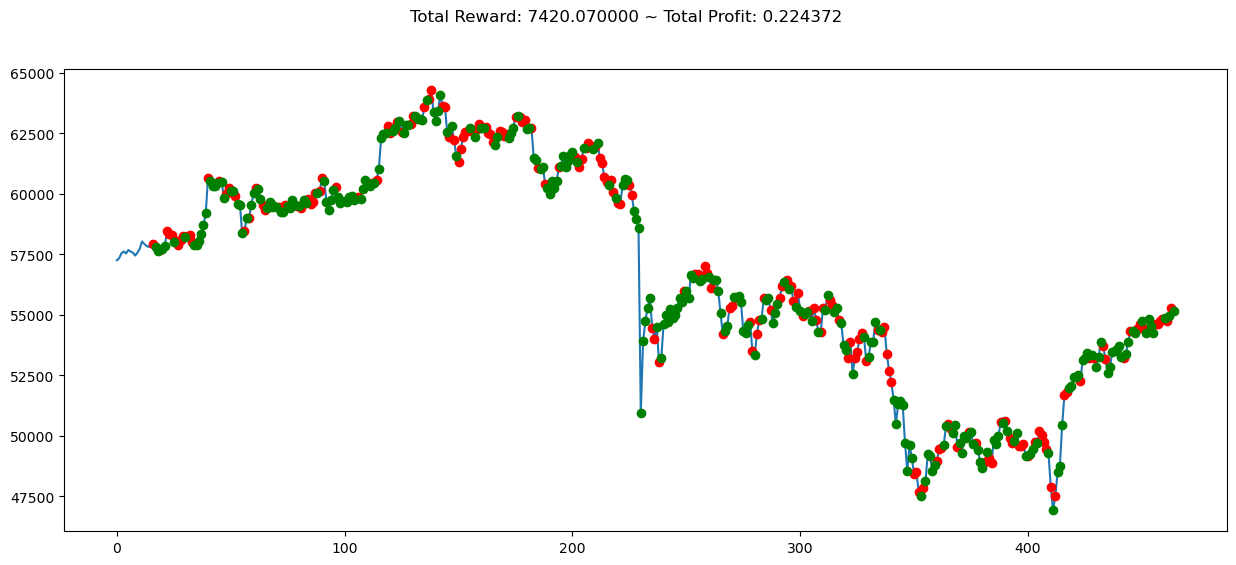

In [85]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()